In [1]:
# IMPORT MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# READ DATASET
# from kaggle
# https://www.kaggle.com/CooperUnion/cardataset

# now that we opened and assigned the dataset to the variable df we can run EDA
df = pd.read_csv("../../Datasets/car_price.csv")

In [75]:
# VARIABLES
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [76]:
# EXPLORE THE DATA
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [77]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [78]:
# CHECK FOR MISSING VALUES
df.isnull().sum()
# our y doesn't have missing values

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [38]:
# In this dataset we have both numerical and categorical data
# Based on what data we have, we can run different analyses
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [39]:
# NORMALIZE INCONSISTENCIES WHITIN THE DATASET (if any) --> this happens especially with CATEGORICAL DATA!
# it's better to have all the column names lowercase and replace all the spaces with underscores
# "df.columns" --> takes ALL the column names
# "str.lower()" --> lowers ALL the column names
# "str.replace(' ','_')" --> replaces spaces with underscores in all column names 
df.columns = df.columns.str.lower().str.replace(" ","_")
print(df.columns)

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [40]:
# we are interesting in getting the data type where the value is equal to 'object'
# we get all the categorical variables' names (index) and turn them into a list
string_values = list(df.dtypes[df.dtypes == 'object'].index)
print(string_values)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [41]:
# we loop through each categorical ('make', 'model' etc) variables and for each value inside that column
# we lowercase and replace spaces with underscores
# we can use "str" attribute only when the value is a string!
for column in string_values:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [42]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [54]:
min_val = df.msrp.min()
max_val = df.msrp.max()
print(min_val,max_val)
# range of values for price (msrp)

2000 2065902


<AxesSubplot:xlabel='msrp', ylabel='Count'>

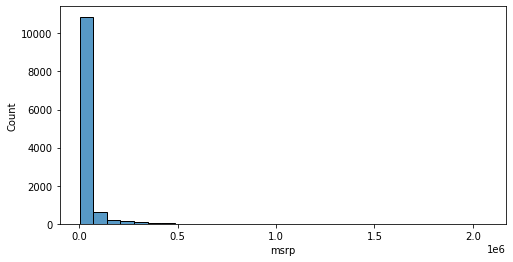

In [69]:
# CHECK THE DISTRIBUTION OF OUR INDEPENDENT VARIABLE
# we look at the distribution of our independent variable, y, "msrp" (car price) in this case
plt.figure(figsize=(8,4))
sns.histplot(df.msrp, bins=30)

# many cars (above 10000) have low prices, few cars have high prices (tail of the distibution)
# here the tail is almost invisible, but this tells us that this is not a normal distribution
# many values are far from the head of the distribution (tail)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

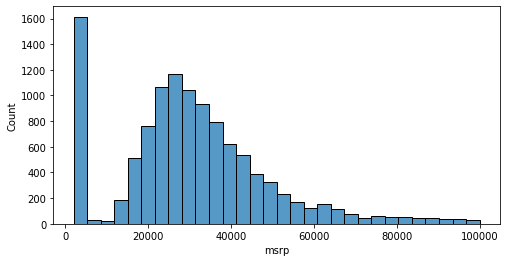

In [70]:
# in the price column we want all the values below 100000
plt.figure(figsize=(8,4))
sns.histplot(df.msrp[df.msrp < 100000], bins=30)

# we see that the head of the distribution, which is a range where we get many values

<AxesSubplot:xlabel='msrp', ylabel='Count'>

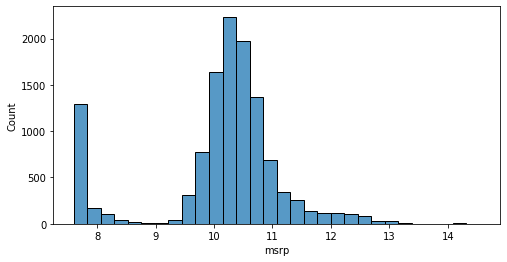

In [73]:
# we can use the log transformation to remove the tail's effect on our model
log_price = np.log1p(df.msrp)

plt.figure(figsize=(8,4))
sns.histplot(log_price, bins=30)

In [ ]:
# by removing the effect of the long tail, we can see the distribution in one plot
# it looks like a normal distribution, but it isn't because of the peak at the very beginning of the plot